In [1]:
### importing the necessary packages to organize my data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
#check for class distribution(0=Normal Transaction, 1= Fraud Transaction)
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
# Define features and target
X = data.drop('Class', axis=1)  # all columns except 'Class'
y = data['Class']               # target


# scale 'Amount' and 'Time' for Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

#### split data into Train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps the class distribution
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))


(227845, 30) (56962, 30)
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


### Logistic Regression

In [18]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create Logistic Regression model
logistic_Reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
# Note: class_weight='balanced' helps the model account for the imbalance

# Train the model
logistic_Reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_Reg.predict(X_test)
y_prob = logistic_Reg.predict_proba(X_test)[:,1]  # predicted probabilities for ROC-AUC


#### Evaluate the model

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9755

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



#### confusion matrix

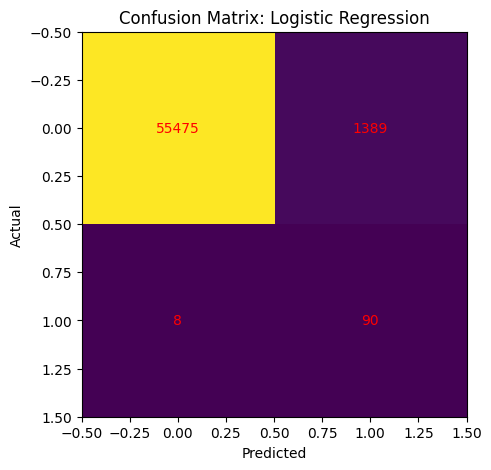

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,5))
plt.imshow(cm)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


### Descision Tree classifier

In [21]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [22]:
# Create the Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')

# Train the model
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)



In [23]:
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_tree))



Accuracy: 0.9763

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [24]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:")
print(cm_tree)


Confusion Matrix:
[[55527  1337]
 [   15    83]]


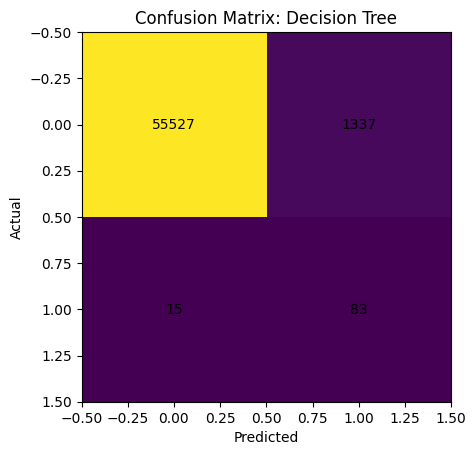

In [26]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

### Random Forest Classifier

In [28]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [30]:

# Create the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=6,               # depth of each tree
    random_state=42,
    class_weight='balanced'    # handle class imbalance
)

In [31]:
# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

In [32]:

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Accuracy: 0.9980

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.86      0.59        98

    accuracy                           1.00     56962
   macro avg       0.73      0.93      0.80     56962
weighted avg       1.00      1.00      1.00     56962



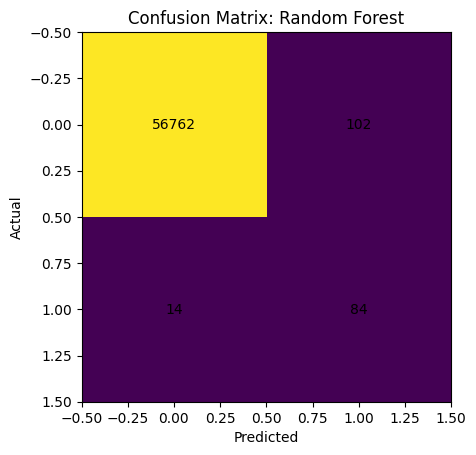

In [33]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
plt.imshow(cm_rf)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha='center', va='center')
plt.show()


##### Feature importance visualization

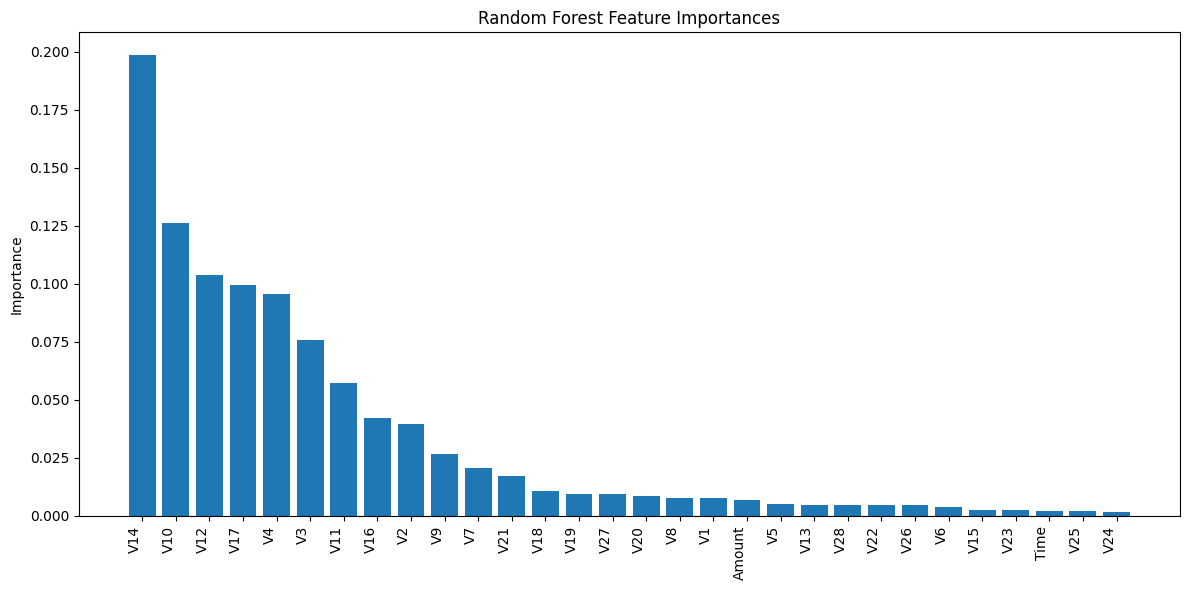

In [36]:
# Get feature importances
importances = rf_clf.feature_importances_
idx = np.argsort(importances)[::-1]  # sort descending

# Making sure feature_names exist
feature_names = X.columns  # get feature names from my data
# Plot
plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), np.array(feature_names)[idx], rotation=90, ha='right')
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()